# Проект: Определение перспективного тарифа для телеком-компании

**Описание исследования:**

В проекте нам предлагают поучаствовать в роли аналитика компании «Мегалайн» — федерального оператора сотовой связи. У клиентов есть на выбор два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.

**Цель исследования:**

Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

**Задачи исследования:**

* Изучить общую информацию о данных
* Подготовить данных
* Проанализировать получившиеся результаты
* Проверить гипотезы
* Сформулировать выводы

**Исходные данные:**

В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. 

**Таблица users (информация о пользователях):**

*user_id* — уникальный идентификатор пользователя

*first_name* — имя пользователя

*last_name* — фамилия пользователя

*age* — возраст пользователя (годы)

*reg_date* — дата подключения тарифа (день, месяц, год)

*churn_date* — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)

*city* — город проживания пользователя

*tariff* — название тарифного плана

**Таблица calls (информация о звонках):**

*id* — уникальный номер звонка

*call_date* — дата звонка

*duration* — длительность звонка в минутах

*user_id* — идентификатор пользователя, сделавшего звонок

**Таблица messages (информация о сообщениях):**

*id* — уникальный номер сообщения

*message_date* — дата сообщения

*user_id* — идентификатор пользователя, отправившего сообщение

**Таблица internet (информация об интернет-сессиях):**

*id* — уникальный номер сессии

*mb_used* — объём потраченного за сессию интернет-трафика (в мегабайтах)

*session_date* — дата интернет-сессии

*user_id* — идентификатор пользователя

**Таблица tariffs (информация о тарифах):**

*tariff_name* — название тарифа

*rub_monthly_fee* — ежемесячная абонентская плата в рублях

*minutes_included* — количество минут разговора в месяц, включённых в абонентскую плату

*messages_included* — количество сообщений в месяц, включённых в абонентскую плату

*mb_per_month_included* — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)

*rub_per_minute* — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)

*rub_per_message* — стоимость отправки сообщения сверх тарифного пакета

*rub_per_gb* — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

**Разделим исследование на части**

[***Часть 1. Изучение общей информации:***](#step1)

[***Часть 2. Подготовка данных к анализу:***](#step2)
 * Приводим данные к нужным типам;
 * Считаем для каждого пользователя:
 
   ◦ количество сделанных звонков и израсходованных минут разговора по месяцам;
   
   ◦ количество отправленных сообщений по месяцам;
   
   ◦ объем израсходованного интернет-трафика по месяцам;
   
   ◦ помесячную выручку с каждого пользователя 

[***Часть 3. Анализ данных:***](#step3)
 *  Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Cчитаем среднее количество, дисперсию и стандартное отклонение. Строим гистограммы.

[***Часть 4. Проверка гипотез:***](#step4)
 * 1. Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются.
 * 2. Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.


[***Часть 5. Общий вывод:***](#step5)


<a id = 'step1'></a>
# Шаг 1. Знакомство с данными

In [4]:
#импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt
from scipy import stats as st
import os

import matplotlib.mlab as mlab

In [5]:
def read(name):
    if os.path.exists(name):
        return pd.read_csv(name) # локальный путь
    else:
        return pd.read_csv(f'/datasets/{name}') # путь, указанный в проекте

In [6]:
#считываем файлы
data_calls = read('calls.csv')
data_messages = read('messages.csv')
data_internet = read('internet.csv')
data_tariffs = read('tariffs.csv')
data_users = read('users.csv')

In [7]:
data_users.head(10)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


In [8]:
data_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [9]:
#информация о звонках
data_calls.head(10)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


In [10]:
data_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [11]:
#информацией о сообщениях
data_messages.head(10)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


In [12]:
data_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [13]:
#информация об интернет-сессиях
data_internet.head(10)

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000


In [14]:
data_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [15]:
data_internet['mb_used'].describe()

count    149396.000000
mean        370.192426
std         278.300951
min           0.000000
25%         138.187500
50%         348.015000
75%         559.552500
max        1724.830000
Name: mb_used, dtype: float64

In [16]:
#информация о тарифах
data_tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<div class="alert alert-block alert-info">
    
<h2> Вывод <a class="tocSkip"></h2>

Критических замечаний по внешнему виду данных нет. В каждой таблице, где есть столбец с датой, нужно будет  изменить тип данных.</br> 
В нескольких таблицах есть общий столбец 'user_id'. По нему можно будет объединить эти таблицы.
</div>

<a id = 'step2'></a>
# Шаг 2. Предобработка данных

In [19]:
# проверяем на наличие явных дубликатов
datasets = [data_calls, data_internet, data_messages, data_users]
for name,df in zip(['data_calls', 'data_internet', 'data_messages', 'data_users'],datasets):
    print(f'Количество дупликатов {name} равно {df.duplicated().sum()}')
    print(f'Количесвто пропусков  {name} равно {df.isna().sum().sum()}')
    print()

Количество дупликатов data_calls равно 0
Количесвто пропусков  data_calls равно 0

Количество дупликатов data_internet равно 0
Количесвто пропусков  data_internet равно 0

Количество дупликатов data_messages равно 0
Количесвто пропусков  data_messages равно 0

Количество дупликатов data_users равно 0
Количесвто пропусков  data_users равно 462



In [20]:
data_users.isna().sum()

user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64

In [22]:
data_users['city'].unique()

array(['Краснодар', 'Москва', 'Стерлитамак', 'Новокузнецк',
       'Набережные Челны', 'Ульяновск', 'Челябинск', 'Пермь', 'Тюмень',
       'Самара', 'Санкт-Петербург', 'Иваново', 'Чебоксары', 'Омск', 'Уфа',
       'Томск', 'Чита', 'Мурманск', 'Петрозаводск', 'Тверь',
       'Екатеринбург', 'Махачкала', 'Вологда', 'Череповец', 'Ярославль',
       'Сочи', 'Хабаровск', 'Ставрополь', 'Рязань', 'Улан-Удэ', 'Тула',
       'Саратов', 'Ростов-на-Дону', 'Казань', 'Иркутск', 'Курск',
       'Калуга', 'Якутск', 'Астрахань', 'Химки', 'Владикавказ',
       'Волгоград', 'Саранск', 'Ижевск', 'Новосибирск', 'Брянск',
       'Тольятти', 'Нижний Тагил', 'Орёл', 'Белгород', 'Воронеж',
       'Волжский', 'Курган', 'Барнаул', 'Красноярск', 'Архангельск',
       'Липецк', 'Кемерово', 'Киров', 'Сургут', 'Пенза', 'Магнитогорск',
       'Нижний Новгород', 'Кострома', 'Владивосток', 'Тамбов', 'Балашиха',
       'Севастополь', 'Калининград', 'Оренбург', 'Смоленск',
       'Нижневартовск', 'Владимир', 'Новороссий

In [21]:
#переименуем столбец для дальнейшей работы
data_tariffs = data_tariffs.rename(columns= {'tariff_name':'tariff'})

<div class="alert alert-block alert-info">
    
**Комментарий студента**
    
Пропущенных значений в датасетах нет, за исключением таблицы 'data_users', где пропуски обоснованы. Неявных дубликатов в названиях городов нет.
</div>

<a id = 'step2_2'></a>
<font color='black' size = +1><b> Работаем с таблицей по звонкам data_calls </b></font><br>

<AxesSubplot:>

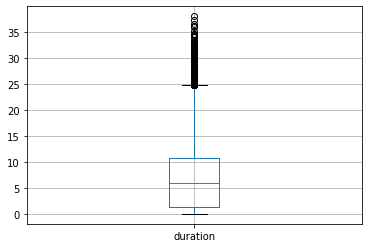

In [23]:
data_calls[['duration']].boxplot()

In [24]:
data_calls['duration'].describe()

count    202607.000000
mean          6.755887
std           5.843365
min           0.000000
25%           1.300000
50%           6.000000
75%          10.700000
max          38.000000
Name: duration, dtype: float64

<div class="alert alert-block alert-info">
    
**Комментарий студента**
    
Длительность звонков до 40 минут - вполне реальный результат. Аномальных данных нет.

</div>

In [25]:
#округлим продолжительность звонков вверх
data_calls['duration'] = np.ceil(data_calls['duration']).astype(int)

#преобразуем тип данных с датой в datetime
data_calls['call_date'] = pd.to_datetime(data_calls['call_date'],format= '%Y-%m-%d')

In [26]:
print('Продолжительность звонков в среднем с учетом 0 - ', round(data_calls['duration'].mean(),2))
print('Продолжительость звонков в среднем без учета 0 - ', round(data_calls[data_calls['duration'] !=0]['duration'].mean(),2))


Продолжительность звонков в среднем с учетом 0 -  7.16
Продолжительость звонков в среднем без учета 0 -  8.9


In [27]:
#создаем столбец с месяцем 
data_calls['month'] = data_calls['call_date'].dt.month

In [28]:
call = data_calls[data_calls['duration'] !=0].pivot_table(index= ['user_id', 'month'], values= 'duration', aggfunc=['count','sum'])
call.columns = ['count','minutes']
call.head(10)

count  minutes
user_id month                
1000    5         17      159
        6         28      172
        7         41      340
        8         42      408
        9         46      466
        10        44      350
        11        37      338
        12        38      333
1001    11        45      430
        12        47      414

<a id = 'step2_3'></a>
<font color='black' size =+1><b> Работаем с таблицей по сообщениям data_messages (аналогично) </b></font><br>

In [29]:
#преобразуем тип данных с датой в datetime и создаем столбец с месяцем 
data_messages['message_date'] = pd.to_datetime(data_messages['message_date'],format= '%Y-%m-%d')
data_messages['month'] = data_messages['message_date'].dt.month

In [30]:
#количество отправленных сообщений по месяцам
messages_count = data_messages.pivot_table(index= ['user_id','month'], values= 'id', aggfunc='count')
messages_count.columns = ['message']
messages_count.head(10)

message
user_id month         
1000    5           22
        6           60
        7           75
        8           81
        9           57
        10          73
        11          58
        12          70
1002    6            4
        7           11

<a id = 'step2_4'></a>
<font color='black' size = +1><b> Работаем с таблицей с интернет-сессиями data_internet (аналогично) </b></font><br>

In [31]:
#преобразуем тип данных с датой в datetime и создаем столбец с месяцем 
data_internet['session_date'] = pd.to_datetime(data_internet['session_date'],format= '%Y-%m-%d')
data_internet['month'] = data_internet['session_date'].dt.month

In [32]:
#удалим столбец, дублирующй индекс
data_internet = data_internet.drop(columns = ['Unnamed: 0'],axis = 1)

In [33]:
#объем израсходованного интернет-трафика по месяцам для каждого клиента
used_mb = data_internet[data_internet['mb_used'] != 0].pivot_table(index= ['user_id','month'], values= 'mb_used', aggfunc=['sum'])
used_mb.columns = ['mb_used']
used_mb.head(10)

mb_used
user_id month          
1000    5       2253.49
        6      23233.77
        7      14003.64
        8      14055.93
        9      14568.91
        10     14702.49
        11     14756.47
        12      9817.61
1001    11     18429.34
        12     14036.66

In [34]:
#округлим количесвто израсходованных Мб согласно тому, как это сказано в задании, и переведем Мбайты в Гбайты
used_gb = ((used_mb//1024)* 1000 + (used_mb % 1024 != 0)*1000)/1000
used_gb.columns = ['gb_used']
used_gb.head(10)

gb_used
user_id month         
1000    5          3.0
        6         23.0
        7         14.0
        8         14.0
        9         15.0
        10        15.0
        11        15.0
        12        10.0
1001    11        18.0
        12        14.0

In [35]:
#объединим данные из полученных сводных таблиц и добавим тариф для каждого клиента,
#а также информацию, связанную с тарифами

#traffic = minutes_count.reset_index().merge(messages_count, on = ['user_id', 'month'], how = 'outer')

traffic = call['minutes'].reset_index().merge(messages_count, on = ['user_id', 'month'], how = 'outer')
traffic = traffic.merge(used_gb, on = ['user_id', 'month'], how = 'outer')
traffic = traffic.merge(data_users[['user_id','tariff']], on= 'user_id', how= 'left')
traffic = traffic.merge(data_tariffs[['rub_monthly_fee','minutes_included','rub_per_minute','messages_included','rub_per_message','mb_per_month_included','rub_per_gb','tariff']], on = 'tariff',how = 'left')

#переведем в гб трафик, входящий в тариф
traffic['mb_per_month_included'] = traffic['mb_per_month_included']/1024

In [36]:
traffic

,user_id,month,minutes,message,gb_used,tariff,rub_monthly_fee,minutes_included,rub_per_minute,messages_included,rub_per_message,mb_per_month_included,rub_per_gb
0,1000,5,159.0,22.0,3.0,ultra,1950,3000,1,1000,1,30.0,150
1,1000,6,172.0,60.0,23.0,ultra,1950,3000,1,1000,1,30.0,150
2,1000,7,340.0,75.0,14.0,ultra,1950,3000,1,1000,1,30.0,150
3,1000,8,408.0,81.0,14.0,ultra,1950,3000,1,1000,1,30.0,150
4,1000,9,466.0,57.0,15.0,ultra,1950,3000,1,1000,1,30.0,150
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,10,NaN,21.0,20.0,smart,550,500,3,50,3,15.0,200
3210,1489,11,NaN,20.0,18.0,smart,550,500,3,50,3,15.0,200
3211,1489,12,NaN,35.0,17.0,smart,550,500,3,50,3,15.0,200
3212,1240,2,NaN,NaN,1.0,ultra,1950,3000,1,1000,1,30.0,150


In [37]:
#переименую столбцы для удобства
#дальше это будет не так важно, поэтому такие имена колонок
traffic = traffic.rename(columns = {'rub_monthly_fee':'fee', 
                                'minutes_included':'mins',
                                'rub_per_minute':'per_mins',
                                'messages_included':'mess',
                                'rub_per_message':'per_mess',
                                'mb_per_month_included':'gb',
                                'rub_per_gb':'per_gb'
                               })

In [38]:
traffic.head(15)

,user_id,month,minutes,message,gb_used,tariff,fee,mins,per_mins,mess,per_mess,gb,per_gb
0,1000,5,159.0,22.0,3.0,ultra,1950,3000,1,1000,1,30.0,150
1,1000,6,172.0,60.0,23.0,ultra,1950,3000,1,1000,1,30.0,150
2,1000,7,340.0,75.0,14.0,ultra,1950,3000,1,1000,1,30.0,150
3,1000,8,408.0,81.0,14.0,ultra,1950,3000,1,1000,1,30.0,150
4,1000,9,466.0,57.0,15.0,ultra,1950,3000,1,1000,1,30.0,150
5,1000,10,350.0,73.0,15.0,ultra,1950,3000,1,1000,1,30.0,150
6,1000,11,338.0,58.0,15.0,ultra,1950,3000,1,1000,1,30.0,150
7,1000,12,333.0,70.0,10.0,ultra,1950,3000,1,1000,1,30.0,150
8,1001,11,430.0,NaN,18.0,smart,550,500,3,50,3,15.0,200
9,1001,12,414.0,NaN,14.0,smart,550,500,3,50,3,15.0,200


<a id = 'step2_5'></a>
<font color='black' size = +1><b> Рассчитываем помесячную выручку с каждого пользователя </b></font><br>

In [39]:
traffic = traffic.fillna(0)

In [40]:
traffic['proceed'] = (traffic['minutes']-traffic['mins']>0)*(traffic['minutes']-traffic['mins'])*traffic['per_mins'] + (traffic['message']-traffic['mess']>0)*(traffic['message']-traffic['mess'])*traffic['per_mess'] +(traffic['gb_used']-traffic['gb']>0)*(traffic['gb_used']-traffic['gb'])*traffic['per_gb'] + traffic['fee']

In [41]:
#данная таблица содержит помесячную информацию о пользователе с его тарифом и общей информацией о тарифе
traffic.head(15)

,user_id,month,minutes,message,gb_used,tariff,fee,mins,per_mins,mess,per_mess,gb,per_gb,proceed
0,1000,5,159.0,22.0,3.0,ultra,1950,3000,1,1000,1,30.0,150,1950.0
1,1000,6,172.0,60.0,23.0,ultra,1950,3000,1,1000,1,30.0,150,1950.0
2,1000,7,340.0,75.0,14.0,ultra,1950,3000,1,1000,1,30.0,150,1950.0
3,1000,8,408.0,81.0,14.0,ultra,1950,3000,1,1000,1,30.0,150,1950.0
4,1000,9,466.0,57.0,15.0,ultra,1950,3000,1,1000,1,30.0,150,1950.0
5,1000,10,350.0,73.0,15.0,ultra,1950,3000,1,1000,1,30.0,150,1950.0
6,1000,11,338.0,58.0,15.0,ultra,1950,3000,1,1000,1,30.0,150,1950.0
7,1000,12,333.0,70.0,10.0,ultra,1950,3000,1,1000,1,30.0,150,1950.0
8,1001,11,430.0,0.0,18.0,smart,550,500,3,50,3,15.0,200,1150.0
9,1001,12,414.0,0.0,14.0,smart,550,500,3,50,3,15.0,200,550.0


In [42]:
#таблица, с которой дальше будем работать
#можно было не создавать новую, а просто удалить столбцы из старой,
#но удобнее было работать, глядя на таблицу с общей информацией о тарифах
df = traffic.drop(columns = ['fee','mins','per_mins','mess','per_mess','gb','per_gb'],axis = 1)
df.head(15)

,user_id,month,minutes,message,gb_used,tariff,proceed
0,1000,5,159.0,22.0,3.0,ultra,1950.0
1,1000,6,172.0,60.0,23.0,ultra,1950.0
2,1000,7,340.0,75.0,14.0,ultra,1950.0
3,1000,8,408.0,81.0,14.0,ultra,1950.0
4,1000,9,466.0,57.0,15.0,ultra,1950.0
5,1000,10,350.0,73.0,15.0,ultra,1950.0
6,1000,11,338.0,58.0,15.0,ultra,1950.0
7,1000,12,333.0,70.0,10.0,ultra,1950.0
8,1001,11,430.0,0.0,18.0,smart,1150.0
9,1001,12,414.0,0.0,14.0,smart,550.0


<div class="alert alert-block alert-info">
    
### Вывод 

Сформироваи таблицу для дальнейшей работы. В ней оставили информацию о количестве израсходованных минут, сообщений и гбайтов, а также сведения о тарифе и ежемесячной выручке для каждого пользователя.

</div>

<a id = 'step3'></a>
# Шаг 3.  Анализ данныx

<font color='black' size = +1><b>Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитайте среднее количество, дисперсию и стандартное отклонение. Постройте гистограммы. Опишите распределения.</b></font>

In [43]:
#функция, которая будет рассчитывать среднее, стандартное отклонение и диспресию
def statistics(x):
    
    m = int(x.median().values)
    std = round(np.std(x.values,ddof = 1),2)
    var = round(np.var(x.values,ddof = 1),2)

    print('Среднее - ', m)
    print('Стандартное отклонение - ', std)
    print('Дисперсия -', var)
    return m, std 

<a id = 'step3_1'></a>
<font color='black' size = +1><b>Тариф Smart</b></font><br>
**Звонки**

In [44]:
x1 = df.query('tariff == "smart"').loc[:,['minutes']]
m1,s1 = statistics(x1)

Среднее -  422
Стандартное отклонение -  190.31
Дисперсия - 36219.32


**Сообщения**

In [45]:
x2 = df.query('tariff == "smart"').loc[:,['message']]
m2,s2 = statistics(x2)
# plt.hist(x2)

Среднее -  28
Стандартное отклонение -  28.23
Дисперсия - 796.81


**Интернет-трафик**

In [46]:
x3 = df.query('tariff == "smart"').loc[:,['gb_used']]
m3,s3 = statistics(x3)

Среднее -  17
Стандартное отклонение -  5.75
Дисперсия - 33.03


In [47]:
#распределение похоже на нормальное
#воспользуемся комулятивной ф.р, чтобы понять, какой процент людей тратит не больше 15 гб
st.norm(m3,s3).cdf(15)

0.3639853984806484

<a id = 'step3_1'></a>
<font color='black' size = +1><b>Тариф Ultra</b></font><br>
**Звонки**

In [48]:
x4 = df.query('tariff == "ultra"').loc[:,['minutes']]
m4,s4 = statistics(x4)

Среднее -  518
Стандартное отклонение -  317.61
Дисперсия - 100873.63


**Сообщения**

In [49]:
x5 = df.query('tariff == "ultra"').loc[:,['message']]
m5,s5 = statistics(x5)

Среднее -  38
Стандартное отклонение -  47.8
Дисперсия - 2285.27


In [50]:
x6 = df.query('tariff == "ultra"').loc[:,['gb_used']]
m6,s6 = statistics(x6)

Среднее -  19
Стандартное отклонение -  9.85
Дисперсия - 97.09


In [51]:
#распределение похоже на нормальное
#воспользуемся комулятивной ф.р, чтобы понять, какой процент людей тратит не больше 30 гб
st.norm(m6,s6).cdf(30)

0.8679496549947727

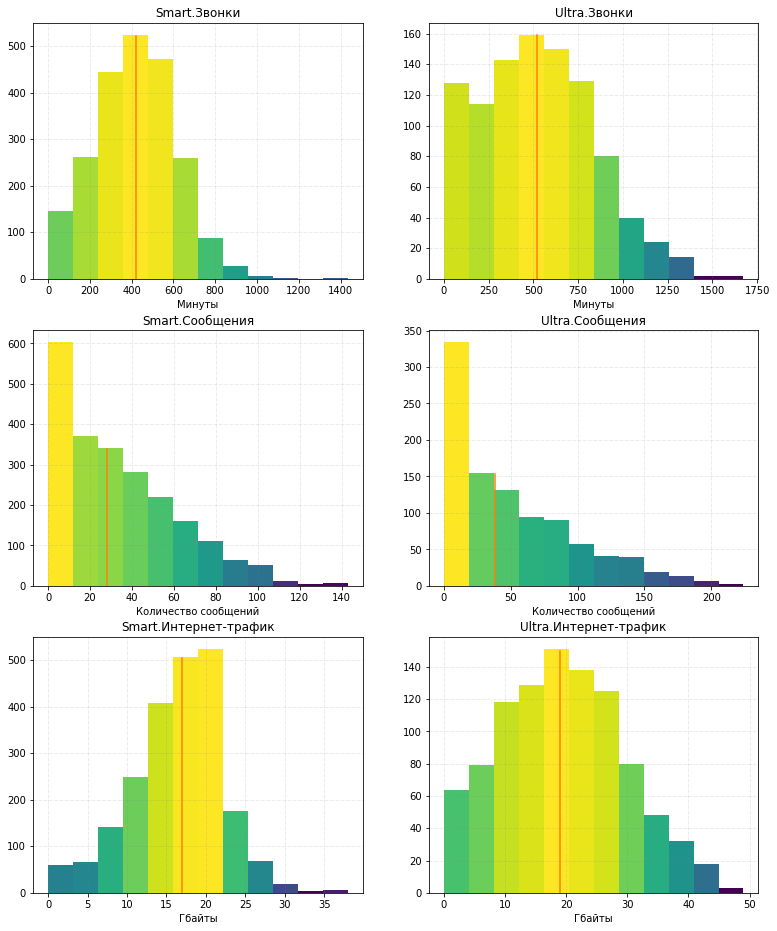

In [52]:
from matplotlib import colors


fig, axes = plt.subplots(nrows = 3, ncols =2, figsize = (13,16))

titles =['Smart.Звонки',
         'Ultra.Звонки',
         'Smart.Сообщения',
         'Ultra.Сообщения',
         'Smart.Интернет-трафик',
         'Ultra.Интернет-трафик'
        ]

labels = ['Минуты','Минуты','Количество сообщений','Количество сообщений','Гбайты','Гбайты']

graf = [x1,x4,x2,x5,x3,x6]

for ax,gr,t,l in zip(axes.flat,graf,titles,labels):
    N, bins, patches = ax.hist(gr, bins = 12)
    ax.set(title = t, xlabel =l)
    fracs = ((N**(1 / 5)) / N.max())
    norm = colors.Normalize(fracs.min(), fracs.max())
 
    for thisfrac, thispatch in zip(fracs, patches):
        color = plt.cm.viridis(norm(thisfrac))
        thispatch.set_facecolor(color)
        
    ax.grid(color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.3)
    

axes[0,0].plot([m1,m1],[0,521])
axes[0,1].plot([m4,m4],[0,159])
axes[1,0].plot([m2,m2],[0,338])
axes[1,1].plot([m5,m5],[0,153])
axes[2,0].plot([m3,m3],[0,505])
axes[2,1].plot([m6,m6],[0,150])
    
plt.show()

<div class="alert alert-block alert-info">
    
### Вывод 

*Звонки*  
    
Медианная продолжительность звонков среди всех пользователей тарифа Smart в 2018 году составляет примерно 422 минуты. Среди пользователей тарифа Ultra - 518 минут. Как показано на гистограмме, клиенты тарифа Ultra не пользуются всеми своими минутами. В среднем, клиенты обоих тарифов укладываются в продолжительность звонков своих пакетов, а клиенты тарифа ultra явно переплачивают за звонки. По этому параметру им бы хватило тарифа Smart. Хотя это неудивительно, звонки - не самый популярный способ свзяи.

*Сообщения* 
    
В среднем пользователи тарифа Smart отправляют в месяц 28 сообщений. Пользователи тарифа Ultra - 38 сообщений. При этом клиентам тарифа Smart иногда приходится доплачивать за лишние сообщения, в то время как клиенты тарифа Ultra не перепачивают за них вовсе.  

*Интернет-трафик*
    
Пользователи тарифа Smart чаще всего используют в месяц 17 Гб трафика, а значит, преплачивают на 400 рублей. Если мы говорим, что трафик клиетов распределен нормально, то можем воспользоваться кумулятивной функцией распределения. Благодаря ей, мы делаем вывод, что только 36% пользователей тарифа Smart укладываются в 15 Гб.<br>
Клиенты, пользующиеся тарифом Ultra, обычно израсходуют в месяц только 19 Гб из 30 возможных. И в 87% случаев не выходят за рамки лимита. 
</div>

<a id = 'step4'></a>
# Шаг 4.  Проверка гипотез

<font color='black' size = +1><b> Cредняя выручка пользователей тарифов «Ультра» и «Смарт» различаются</b></font><br>

**Ho - средние выручки пользователей тарифов не отличаются.<br>
H1 - выручка отличается**

In [53]:
#выручка от пользователей тарифа smart
proceed_smart = df.query('tariff == "smart"')['proceed'].values
#выручка от пользователей тарифа ultra
proceed_ultra = df.query('tariff == "ultra"')['proceed'].values

alpha = .05 # критический уровень статистической значимости

#гипотеза о равенсвте средних двух генеральных совокупностей по выборкам, поэтому используем метод ttest_ind
results = st.ttest_ind(proceed_smart, proceed_ultra, equal_var = False)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  4.2606313931076085e-250
Отвергаем нулевую гипотезу


<div class="alert alert-block alert-info">
    
**Комментарий**
    
Т.к. коммерческий департамент хочет понять, какой тариф приносит больше денег, поставим ворос по-другому. Предположим, что выручка от клиентов тарифа Ultra больше, и проверим эту гипотезу <br>
    
Тогда:    
**Ho - средние выручки пользователей тарифов не отличаются.<br>
H1 - выручка от клиентов тарифа Smart меньше**

</div>

In [54]:
alpha = .05 # критический уровень статистической значимости

results = st.ttest_ind(proceed_smart, proceed_ultra, equal_var = False)

# тест односторонний: p-value будет в два раза меньше
print('p-значение: ', results.pvalue/2)

if results.pvalue/2 < alpha and proceed_smart.mean() < proceed_ultra.mean():
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  2.1303156965538042e-250
Отвергаем нулевую гипотезу


<div class="alert alert-block alert-info">
    
**Комментарий**
    
тариф Ultra приносит больше денег. Даже с учетом того, что его пользователей гораздо меньше.
</div>

<font color='black' size = +1><b> Cредняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов</b></font><br>

**Ho - средняя выручка пользоватеей из Москвы не отличается от выручки пользователей из других регионов.<br>
H1 - выручка отличается**

In [55]:
#добавим в таблицу информацию о городе клиента
df = df.merge(data_users[['user_id','city']], on= 'user_id', how= 'left')

In [56]:
# выручка от пользователей из москвы
proceed_moscow = df.query('city == "Москва"')['proceed'].values
# выручка от пользователя из остальных городов 
proceed_other = df.query('city != "Москва"')['proceed'].values

alpha = .05 # критический уровень статистической значимости

#гипотеза о равенсвте средних двух генеральных совокупностей по выборкам, поэтому используем метод ttest_ind
results = st.ttest_ind(proceed_moscow, proceed_other, equal_var = False)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  0.5257376663729298
Не получилось отвергнуть нулевую гипотезу


<a id = 'step5'></a>
<div class="alert alert-block alert-info">
    
<h2> Общий вывод <a class="tocSkip"></h2>

В данном исследовании мы сравнивали клиентов двух тарифов - Smart и Ultra.

После ознакомления с данными, была проведена их предобработка. Она включила в себя приведение данных к нужным типам, поиск и справление ошибок в данных, составление сводных таблиц для дальнейшей работы. 
    
В ходе работы были рассмотрены длительность и количесвто звонков, количество отправленных сообщений, объем израсходованного интернет-трафика и выручка за 2018 год, разбитые по месяцам. Для каждого из параметров были построены гистограммы, найдены статисчтические показатели: среднее, стандартное отклонение и диспресия.
    
На основе этих показателей можно сформуировать вывод о том, что пользователи тарифа ultra часто не используют все предоставленные услуги своего тарифа и, соответственно, переплачивают. Им было бы выгоднее перейти на тариф smart.

Также  мы проверили две основные гипотезы:

Средняя выручка пользователей тарифов Ultra и Smart различается. Она подтвердилась, и мы попробовали конкретизировать гипотезу, предположив, что тариф Ultra приносит больше прибыли. Эта гипотеза тоже подтвердилась.

Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов. Гипотеза не подтвердилась.
    
Если отвечать на вопрос "какой тариф лучше", то ответ для компании "Мегалайн" - тариф Ultra, а клиентам выгоднее пользоваться тарифом Smart.
    </div>